# 1. Project Objective and Data Overview

The project aims to analyze **Netflix movie data** to identify patterns and trends in genres, ratings, and popularity.  
The analysis will address the following four key questions:

1. **Which genres are most common on Netflix?**
2. **How has the number of movie releases changed over the years?**
3. **Do popular movies generally have high ratings?**
4. **Which genres are the most popular?**

**Dataset:** `mymoviedb.csv`  
**Rows:** 9,827  
**Columns:** 9  

The dataset includes the following key columns:  
- **Release_Date** – Year of movie release  
- **Title** – Name of the movie  
- **Overview** – Short synopsis or description of the movie  
- **Popularity** – Popularity score  
- **Vote_Count** – Number of audience votes received  
- **Vote_Average** – Average viewer rating  
- **Original_Language** – Language in which the movie was originally released  
- **Genre** – Movie genre(s)  
- **Poster_Url** – Link to the movie poster image


# 2. Data Loading and Initial Inspection

In this section, we import the necessary Python libraries and load the dataset to begin our analysis.  
The goal is to understand the dataset’s basic structure, check for missing values, and get an initial sense of the data before moving into deeper analysis.


In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
df = pd.read_csv("mymoviedb.csv", lineterminator='\n')

In [163]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


### Checking Data Structure
Before analysis, we need to understand the dataset — number of rows, columns, and data types.


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


**Insight:**  
We have 9,827 rows and 9 columns. All columns have the correct types except `Release_Date`, which we’ll convert to `datetime`.


In [165]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [166]:
df.duplicated().sum()

np.int64(0)

In [167]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


**🔍 Exploration Summary**
1. Our dataset contains 9,827 rows and 9 columns.
2. It looks pretty clean and tidy — no missing values or duplicates to worry about.
3. The Release_Date column needs to be converted to datetime format, and we’ll extract just the year for simplicity.
4. Columns like Overview, Original_Language, and Poster_Url don’t add much value to the analysis, so we’ll go ahead and drop them.
5. There are some obvious outliers in the Popularity column that might need special attention.
6. To make the Vote_Average more insightful, we’ll consider categorizing it into groups or bands.
7. The Genre column has comma-separated values with extra spaces — it needs some cleaning and will be converted into a categorical format or    better analysis.

# 3. Data Cleaning

In this stage, the dataset is prepared for analysis by:  
- Converting columns to appropriate data types  
- Handling missing or inconsistent values  
- Transforming and restructuring columns for easier analysis  


In [168]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [169]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [170]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


**Dropping the columns**

In [171]:
cols = ['Overview', 'Original_Language', 'Poster_Url']

In [172]:
df.drop(cols, axis=1, inplace=True)

In [173]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [174]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


**📊 Categorizing Vote_Average Column**

We will categorize the values in the Vote_Average column into 4 groups:

'popular'

'average'

'below_avg'

'not_popular'

To do this, we’ll use the custom function categorize_col() defined earlier.

In [175]:
def categorize_col(df, col, labels):
    edges = [df[col].describe()['min'],
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe()['max']]
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates = 'drop')
    return df

In [176]:
labels = ['not_popular', 'below_avg', 'average', 'popular']
categorize_col(df, 'Vote_Average', labels)
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [115]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [177]:
df.dropna(inplace = True)
df.isnull().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [178]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


**We split the genres into a list and then explode the DataFrame so that each row contains only one genre per movie.**

In [179]:
df['Genre'] = df['Genre'].fillna('').astype(str)

# Split the 'Genre' column into a list for each movie
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)

df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [180]:
#casting column into category

df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [182]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

In [183]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


# 4. Exploratory Data Analysis (EDA) and Visualization

In this section, the cleaned dataset is explored to uncover patterns, trends, and relationships.  
Data visualizations are created to answer the project’s key questions and provide clear, insightful interpretations of the results.


In [184]:
sns.set_style('whitegrid')

**What is the most frequent genre of movies released on Netflix?**

In [185]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

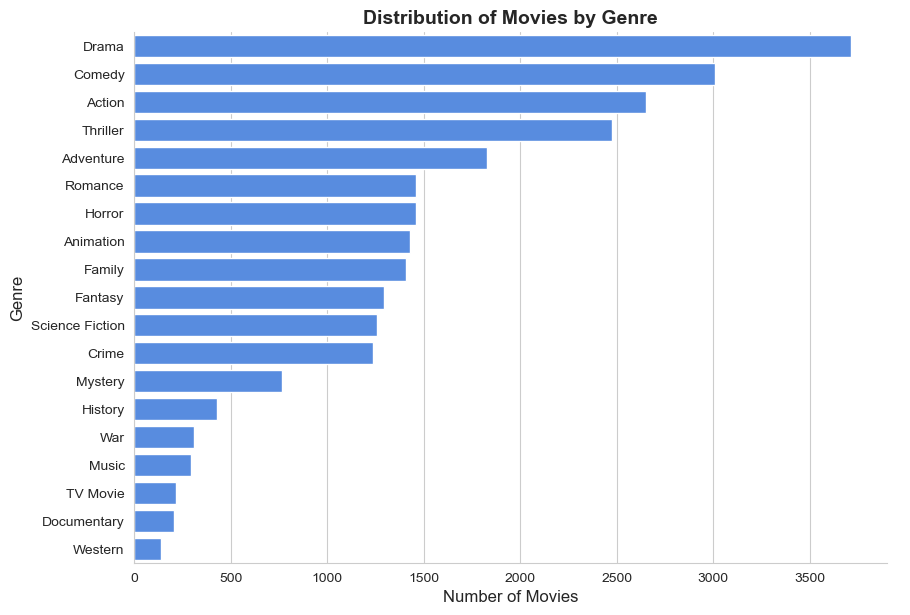

In [186]:
# Plot genre distribution
sns.catplot(
    y="Genre", 
    data=df, 
    kind="count",
    order=df["Genre"].value_counts().index,
    color="#4287f5",
    height=6, 
    aspect=1.5
)

# Add clear title and axis labels
plt.title("Distribution of Movies by Genre", fontsize=14, fontweight="bold")
plt.xlabel("Number of Movies", fontsize=12)
plt.ylabel("Genre", fontsize=12)
plt.show()


**Insight:**  
Drama, Comedy, and Action are the most common genres, making up over 50% of Netflix’s movie library.


**Which movie has the highest number of votes in the Vote_Count column?**

In [187]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


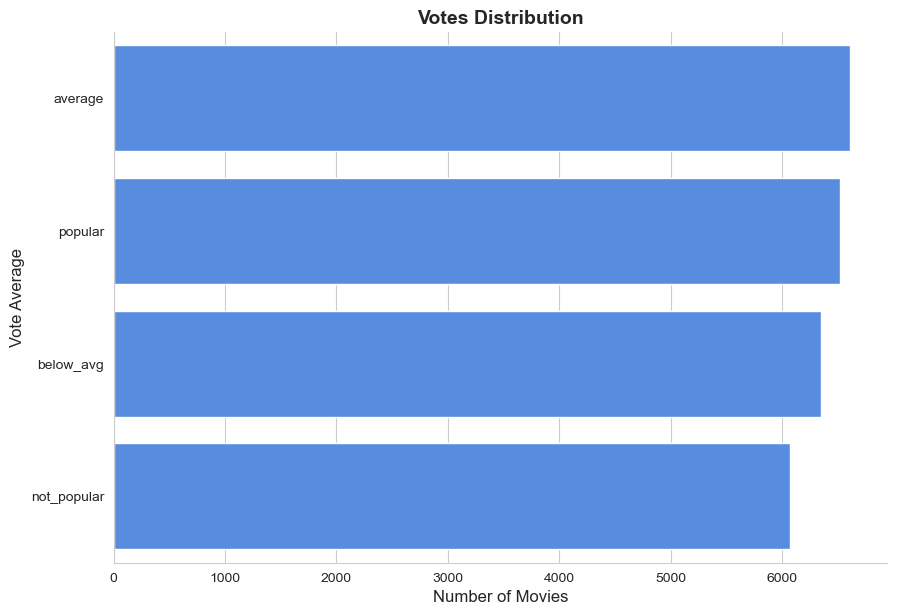

In [188]:
sns.catplot(
    y="Vote_Average",
    data=df,
    kind="count",
    order=df["Vote_Average"].value_counts().index,
    color="#4287f5",
    height=6,
    aspect=1.5
)
plt.title("Votes Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Number of Movies", fontsize=12)
plt.ylabel("Vote Average", fontsize=12)
plt.show()

**Which movie has the highest popularity, and what is its genre?**

In [189]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure


In [190]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


**Which movie has the lowest popularity, and what is its genre?**

In [191]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


**Which year has the most filmed movies?**

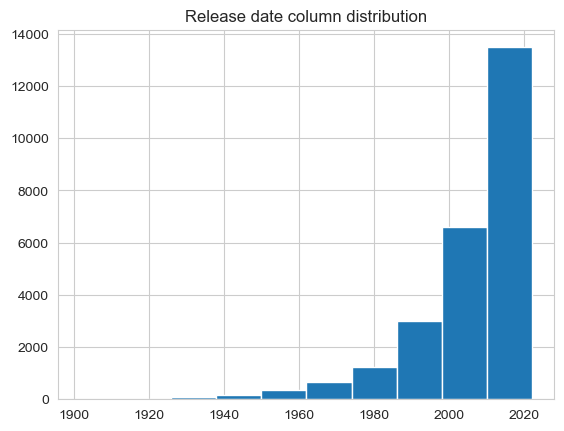

In [192]:
df['Release_Date'].hist()
plt.title('Release date column distribution')
plt.show()

# 5. Key Takeaways and Future Work

The project successfully answers the initial questions and provides a solid foundation for further analysis.

### **Key Takeaways**
- **Genres:** Drama, Comedy, and Action are the most dominant genres in Netflix's catalog.  
- **Release Trends:** Movie releases saw a major peak between 2017 and 2019.  
- **Popularity vs. Ratings:** While some top-performing movies are both popular and highly rated, a more detailed analysis is needed to generalize this trend.  
- **Genre Popularity:** Action and Adventure movies appear to have high popularity scores.  

### **Future Work**  
- Develop a recommendation model based on movie ratings and genres.  